In [ ]:
#!pip install google-cloud-bigquery

ERROR: mysql-connector-python 8.0.30 has requirement protobuf<=3.20.1,>=3.11.0, but you'll have protobuf 4.24.4 which is incompatible.
You should consider upgrading via the 'c:\users\acer\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.12.4
    Uninstalling protobuf-3.12.4:
      Successfully uninstalled protobuf-3.12.4
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.40.0
    Uninstalling grpcio-1.40.0:
      Successfully uninstalled grpcio-1.40.0


In [ ]:
#!pip install google-cloud-bigquery
# !pip install google-cloud
# !pip install google-cloud-bigquery[pandas]
# !pip install google-cloud-storage

You should consider upgrading via the 'c:\users\acer\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\acer\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\acer\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%load_ext google.cloud.bigquery

In [3]:
import os
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = 'C:/Users/Sama Jayaprakash/Downloads/premium-cipher-402009-9b0bb1dd5c03.json'

In [4]:
import os
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = '/content/premium-cipher-402009-9b0bb1dd5c03.json'

In [5]:
#Imports google cloud client library and initiates BQ service
from google.cloud import bigquery
client = bigquery.Client() #OOP

In [6]:
#client says that BQ functions can now be started to be used in JN

In [7]:
sql = """
SELECT
*
FROM
`premium-cipher-402009.tutort_cab.place_info` limit 1
"""

df1 = client.query(sql).to_dataframe()
df1.head()

,place_id,name,condition,location,ports,solar_non_metered,length,breadth,remarks,area_code,updated_date
0,1003,8th & Guadalupe,closed,800 Guadalupe St.,<NA>,None,<NA>,NaN,None,9,2021-01-04 12:00:00+00:00


This the table for

#EDA



In [8]:
x = """
SELECT
*
FROM
`premium-cipher-402009.tutort_cab.rides` limit 1
"""

df2 = client.query(x).to_dataframe()
df2.head()

,trip_id,membership_type,vehicle_no,vehicle_type,source_time,source_id,source_name,dest_id,dest_name,total_time
0,27448819,Local365,19693,electric,2022-08-11 21:19:09+00:00,7189,28th/Rio,2823,East 5th/Broadway @ Capital Metro HQ,52


In [9]:
x="""
SELECT membership_type,round(max(total_time)/60,2) as max_time_mins,
round(avg(total_time)/60,2) as avg_time_mins
 from
`premium-cipher-402009.tutort_cab.rides` group by 1 order by 2 desc
"""
df2=client.query(x).to_dataframe()
df2.head()

,membership_type,max_time_mins,avg_time_mins
0,Single Trip (Pay-as-you-ride),87.02,1.06
1,24 Hour Walk Up Pass,68.07,0.83
2,Pay-as-you-ride,58.97,0.86
3,3-Day Weekender,47.38,0.57
4,Local365,47.23,0.37


single trip has the max time taken for the trip duration to complete , therefore it makes the metrics to impact more


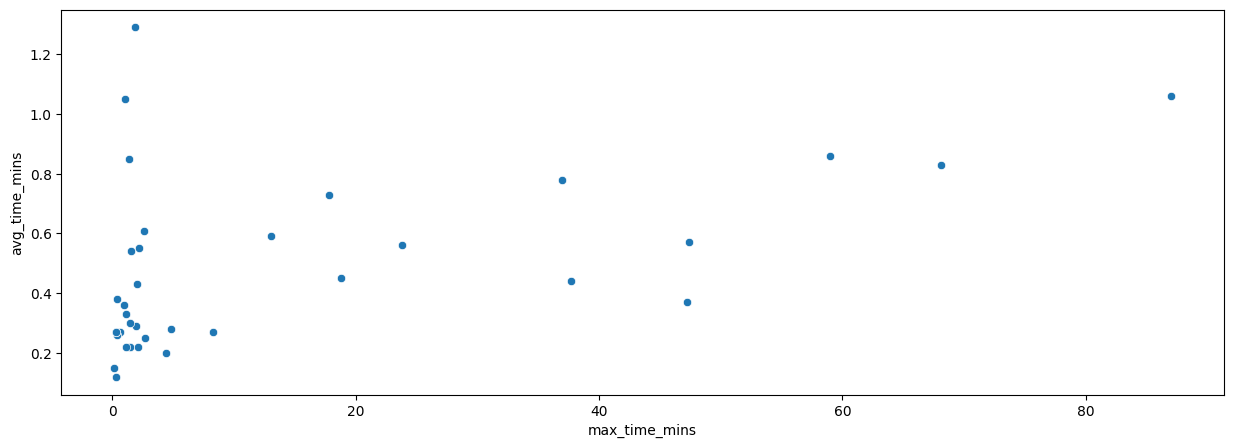

In [10]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='max_time_mins',y='avg_time_mins',data=df2)
plt.show()

For the higher end of max time the avg time is also greater

In [11]:
x="""
SELECT EXTRACT(YEAR from source_time) as year,membership_type,count(*) as cnt_rides from
`premium-cipher-402009.tutort_cab.rides` group by 1,2 order by 2 desc
"""
df2=client.query(x).to_dataframe()
df2.head()


,year,membership_type,cnt_rides
0,2016,Weekender ($15 plus tax),34
1,2017,Weekender,663
2,2016,Weekender,271
3,2016,Walk Up,2978
4,2017,Walk Up,2939


The top 5 locations which have highest total time

In [12]:
x = """
With row_num as (
select distinct b.location, a.total_time
FROM `premium-cipher-402009.tutort_cab.rides` a
join `premium-cipher-402009.tutort_cab.place_info` b
on a.source_id = b.place_id)

select location from
(select location, ROW_NUMBER() OVER(order by total_time desc) as rn
from row_num)
where rn <= 5

"""

df2 = client.query(x).to_dataframe()
df2.head()

,location
0,5104 East 5th. Street
1,698 Davis St
2,600 Congress Ave.
3,606 Trinity Street
4,1611 W 5th St


For each membership type the top 5 locations with highest total time of ride completion

In [13]:
x = """
With row_num as (select membership_type,total_time,
ROW_NUMBER() OVER(partition by  membership_type order by total_time desc) as rn
FROM `premium-cipher-402009.tutort_cab.rides`
where membership_type is not null
order by 1,3
)

select membership_type,total_time
from row_num where rn <=5
order by 1,2 desc

"""

df2 = client.query(x).to_dataframe()
df2.head(60)

,membership_type,total_time
0,24 Hour Walk Up Pass,4084
1,24 Hour Walk Up Pass,2306
2,24 Hour Walk Up Pass,1548
3,24 Hour Walk Up Pass,1492
4,24 Hour Walk Up Pass,1407
5,3-Day Weekender,2843
6,3-Day Weekender,1402
7,3-Day Weekender,1176
8,3-Day Weekender,1031
9,3-Day Weekender,1010


In [ ]:
#1 Which top 5 source location have the highest total_time?
#2 For each membership type what are the top 5 total_time?

In [ ]:
BigQuery --> scalablity, distributed computing
JN --> visualization and readability, systematics codes, structure

In [14]:
sql = """
SELECT
source_name,
membership_type,
EXTRACT(HOUR FROM source_time) AS hourofstart,
total_time
FROM
`premium-cipher-402009.tutort_cab.rides`
WHERE
EXTRACT(YEAR FROM source_time) = 2018
AND total_time > 0
"""

df = client.query(sql).to_dataframe()
df.head()

,source_name,membership_type,hourofstart,total_time
0,Zilker Park,Single Trip,15,44
1,Zilker Park,Explorer,14,22
2,Nueces & 3rd,Local30,18,7
3,Nueces & 3rd,Local30,19,10
4,11th & Salina,HT Ram Membership,19,30


In [ ]:
df.shape

(19, 4)

# EDA

In [15]:
sql = """
SELECT membership_type, round(max(total_time)/60,2) as max_time_mins,
 round(avg(total_time)/60,2) as avg_time_mins
FROM
`premium-cipher-402009.tutort_cab.rides`
group by 1
order by 2 desc
"""

df = client.query(sql).to_dataframe()
df

,membership_type,max_time_mins,avg_time_mins
0,Single Trip (Pay-as-you-ride),87.02,1.06
1,24 Hour Walk Up Pass,68.07,0.83
2,Pay-as-you-ride,58.97,0.86
3,3-Day Weekender,47.38,0.57
4,Local365,47.23,0.37
5,Student Membership,37.70,0.44
6,Walk Up,36.97,0.78
7,Local31,23.78,0.56
8,Weekender,18.77,0.45
9,Explorer,17.80,0.73


Single Trip (Pay-as-you-ride) has the highest max time maybe becuase of adhoc travel plans

In [16]:
import warnings
warnings.filterwarnings('ignore')

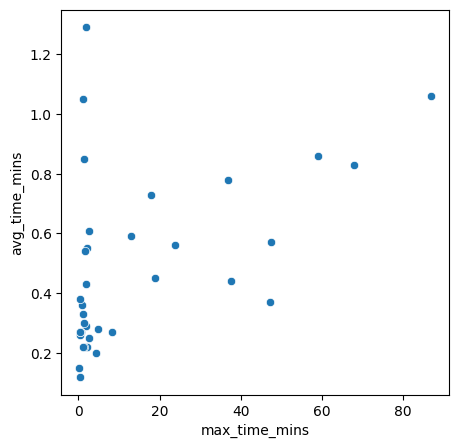

In [17]:
plt.figure(figsize = (5,5))
sns.scatterplot(x='max_time_mins',y='avg_time_mins',data=df)
plt.show()

""


In [18]:
sql ="""
select * from
`premium-cipher-402009.tutort_cab.rides`
limit 1
"""

# Run the query, and return a pandas DataFrame
df1 = client.query(sql).to_dataframe()
df1.head()

,trip_id,membership_type,vehicle_no,vehicle_type,source_time,source_id,source_name,dest_id,dest_name,total_time
0,27448819,Local365,19693,electric,2022-08-11 21:19:09+00:00,7189,28th/Rio,2823,East 5th/Broadway @ Capital Metro HQ,52


In [19]:
sql ="""
select * from
`premium-cipher-402009.tutort_cab.place_info`
limit 1
"""

# Run the query, and return a pandas DataFrame
df2 = client.query(sql).to_dataframe()
df2.head()

,place_id,name,condition,location,ports,solar_non_metered,length,breadth,remarks,area_code,updated_date
0,1003,8th & Guadalupe,closed,800 Guadalupe St.,<NA>,None,<NA>,NaN,None,9,2021-01-04 12:00:00+00:00


In [ ]:
# #standardSQL
# WITH stats AS (
#   SELECT DATE(PARSE_TIMESTAMP('%Y/%m/%d %T', datetime)) dt,
#     AVG(qty) - 1.5 * STDDEV(qty) down,
#     AVG(qty) + 1.5 * STDDEV(qty) up
#   FROM `project.dataset.table`
#   GROUP BY dt
# )
# SELECT port, qty, datetime
# FROM `project.dataset.table`
# JOIN stats
# ON dt = DATE(PARSE_TIMESTAMP('%Y/%m/%d %T', datetime))
# WHERE NOT qty BETWEEN down AND up

In [20]:
sql ="""
select total_time from
`premium-cipher-402009.tutort_cab.rides`
"""

# Run the query, and return a pandas DataFrame
total_time = client.query(sql).to_dataframe()
total_time.head()

,total_time
0,52
1,11
2,36
3,36
4,43


In [22]:
total_time.describe()

,total_time
count,50000.0
mean,37.2474
std,91.490795
min,2.0
25%,10.0
50%,20.0
75%,40.0
max,5221.0


In [23]:
sql ="""
with diff as
(select total_time - AVG(total_time) OVER() as num,
STDDEV_POP(total_time) OVER() as denom from
`premium-cipher-402009.tutort_cab.rides`)

select num/denom as z_score from diff
where num/denom<=3 and num/denom >=-3
"""

# Run the query, and return a pandas DataFrame
z_score = client.query(sql).to_dataframe()
z_score

,z_score
0,0.161248
1,-0.286889
2,-0.013634
3,-0.013634
4,0.062877
...,...
49468,-0.254098
49469,-0.210377
49470,-0.286889
49471,-0.155727


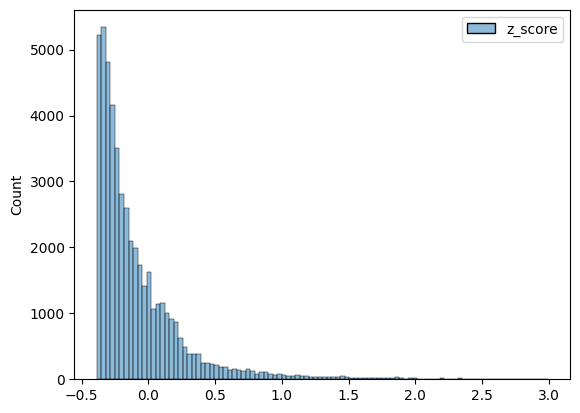

In [24]:
sns.histplot(z_score,bins=100)
plt.show()

In [25]:
z_score.describe()

,z_score
count,49473.000000
mean,-0.078776
std,0.361308
min,-0.385260
25%,-0.297819
50%,-0.199447
75%,0.019156
max,2.992163


In [ ]:
IQR outlier handling

Q1 = 25TH PERCENTILE
Q3 = 75TH PERCENTILE

iqr = Q3-Q1

where x < Q1-1.5*iqr  or >Q3+1.5*IQR

In [26]:
sql ="""
with cte as
(select total_time,percent_rank() over(order by total_time) as pr from
`premium-cipher-402009.tutort_cab.rides`)

select total_time,pr from cte where pr<=0.25
"""

# Run the query, and return a pandas DataFrame
z_score = client.query(sql).to_dataframe()
z_score

,total_time,pr
0,2,0.000000
1,2,0.000000
2,2,0.000000
3,2,0.000000
4,2,0.000000
...,...,...
13833,10,0.243965
13834,10,0.243965
13835,10,0.243965
13836,10,0.243965


In [27]:
sql ="""
with cte as
(select total_time,percent_rank() over(order by total_time) as pr from
`premium-cipher-402009.tutort_cab.rides`)

select total_time,pr from cte where pr>=0.75
"""

# Run the query, and return a pandas DataFrame
z_score = client.query(sql).to_dataframe()
z_score

,total_time,pr
0,41,0.752915
1,41,0.752915
2,41,0.752915
3,41,0.752915
4,41,0.752915
...,...,...
12350,2843,0.999920
12351,3141,0.999940
12352,3538,0.999960
12353,4084,0.999980


So Q1=10  and Q3=41 so the IQR will be 41-10=31
for total_time values which are less than 10-1.5*31= -36.5 as lowe end of the boxplot. 41+1.5*41=102.5 is the other end. We need to find values above this range and handle them

In [28]:
sql ="""
select total_time from
`premium-cipher-402009.tutort_cab.rides` where total_time>102.5 or total_time <-36.5

"""

# Run the query, and return a pandas DataFrame
z_score = client.query(sql).to_dataframe()
z_score

,total_time
0,744
1,847
2,198
3,860
4,911
...,...
2443,165
2444,113
2445,1010
2446,268


there are 2448 columns in this datset which are outside the defined rnge of boxplot and are considered as outliers. So we can either use trimming or capping to handle this outliers.

In [29]:
sql ="""
update
`premium-cipher-402009.tutort_cab.rides` set total_time = case  total_time when >102.5 then 102.5
end
"""
r=client.query(x)


In [30]:
x="""
create table jp as (
select * from
`premium-cipher-402009.tutort_cab.rides` where total_time<=102.5
"""

# Run the query, and return a pandas DataFrame
z_score = client.query(x)
z_score

QueryJob<project=premium-cipher-402009, location=US, id=068d7deb-6efe-4b6f-8880-23b2211bdae2>

In [31]:
sql = """
SELECT
*
FROM
`premium-cipher-402009.tutort_cab.rides`
"""

df = client.query(sql).to_dataframe()
df.head()

,trip_id,membership_type,vehicle_no,vehicle_type,source_time,source_id,source_name,dest_id,dest_name,total_time
0,27448819,Local365,19693,electric,2022-08-11 21:19:09+00:00,7189,28th/Rio,2823,East 5th/Broadway @ Capital Metro HQ,52
1,27566467,Pay-as-you-ride,19734,electric,2022-08-23 18:29:20+00:00,7189,28th/Rio,4879,16th/San Antonio,11
2,27412332,Local31,21699,electric,2022-08-07 15:43:58+00:00,7189,28th/Rio,4879,16th/San Antonio,36
3,27731417,Local31,21829,electric,2022-09-06 14:42:16+00:00,7189,28th/Rio,4879,16th/San Antonio,36
4,27824278,Explorer,19177,electric,2022-09-14 11:27:37+00:00,7189,28th/Rio,4879,16th/San Antonio,43


In [32]:
df['source_name'].unique()

array(['28th/Rio', '22nd/Pearl', '3rd/Nueces', '4th/Sabine', '6th/Lavaca',
       '8th/Lavaca', 'Pease Park', '11th/Salina', '6th/Trinity',
       'Main Office', 'Zilker Park', '13th/Trinity', '5th/Campbell',
       '6th/Chalmers', '6th/Congress', 'Lavaca & 6th', 'Nueces & 3rd',
       'Nueces @ 3rd', 'Rainey/Davis', '11th & Salina', '8th/Red River',
       '9th/Henderson', '10th/Red River', '6th & Congress',
       '22.5/Rio Grande', '23rd/Rio Grande', '28th/Rio Grande',
       '8th/San Jacinto', 'Guadalupe & 6th', 'Henderson & 9th',
       'Rainey/Driskill', 'Republic Square', 'Rio Grande/12th',
       'Rosewood/Chicon', '11th/San Jacinto', '16th/San Antonio',
       '5th & San Marcos', 'One Texas Center', 'Waller & 6th St.',
       'Zilker Park West', 'Palmer Auditorium', 'Rainey @ River St',
       'Rosewood & Chicon', 'Rosewood/Angelina', '11th & San Jacinto',
       '13th & San Antonio', 'Barton Springs Pool', 'Lake Austin/Enfield',
       'South Congress/Mary', 'East 11th/San Ma

# Machine Learning

In [33]:
# Create a Linear regression model
sql = """
CREATE or REPLACE MODEL `premium-cipher-402009.tutort_cab.lir_1`
OPTIONS
(model_type='linear_reg', labels=['total_time'],
optimize_strategy = 'batch_gradient_descent',

CATEGORY_ENCODING_METHOD = 'ONE_HOT_ENCODING'

) AS
SELECT
source_name,
membership_type,
EXTRACT(HOUR FROM source_time) AS hourofstart,
total_time
FROM
`premium-cipher-402009.tutort_cab.rides`
WHERE
EXTRACT(YEAR FROM source_time) <= 2021
AND total_time > 0

"""
df = client.query(sql).to_dataframe()
df.head()

""


In [ ]:
response encoding

In [ ]:
source name , source origin_hour --> predict cnt of rides


cnt of rides

    W = (XT*X)-1XTY

In [34]:
sql = """
CREATE OR REPLACE TABLE `premium-cipher-402009.tutort_cab.train_lir` AS
SELECT
    IFNULL(source_name, "") as source_name,
    TIMESTAMP_TRUNC(source_time, HOUR) as source_hour,
    COUNT(*) as num_rides
FROM `premium-cipher-402009.tutort_cab.rides`
WHERE DATE(source_time) < '2022-01-01'
GROUP BY source_name, source_time
ORDER BY source_name, source_time

"""

df_train = client.query(sql).to_dataframe()
df_train.head()

""


In [35]:
sql = """
CREATE OR REPLACE MODEL`premium-cipher-402009.tutort_cab.lir_2`
OPTIONS(model_type='linear_reg', optimize_strategy = 'batch_gradient_descent') AS
SELECT
    source_name,
    source_hour,
    num_rides as label
FROM `premium-cipher-402009.tutort_cab.train_lir`

"""

df_m = client.query(sql).to_dataframe()
df_m.head()

""


In [36]:
sql = """
SELECT
  *
FROM
  ML.TRAINING_INFO(MODEL `premium-cipher-402009.tutort_cab.lir_1`)
ORDER BY iteration
"""
df_t= client.query(sql).to_dataframe()
df_t

,training_run,iteration,loss,eval_loss,learning_rate,duration_ms
0,0,0,8863.904379,7224.059372,0.2,2618
1,0,1,8520.745754,6926.810086,0.4,2935
2,0,2,8477.480826,6883.775935,0.4,2555


In [37]:
sql = """
SELECT
  *
FROM ML.EVALUATE(MODEL `premium-cipher-402009.tutort_cab.lir_2`, (
    SELECT
    IFNULL(source_name, "") as source_name,
    TIMESTAMP_TRUNC(source_time, HOUR) as source_hour,
    COUNT(*) as label
FROM `premium-cipher-402009.tutort_cab.rides`
WHERE DATE(source_time) >= '2022-01-01'
GROUP BY source_name, source_time
ORDER BY source_name, source_time))

"""

df_test= client.query(sql).to_dataframe()
df_test.head()

,mean_absolute_error,mean_squared_error,mean_squared_log_error,median_absolute_error,r2_score,explained_variance
0,0.134314,0.020297,0.005522,0.11065,-135.940498,-14.223643


In [38]:
sql = """
SELECT
    source_name,
    SUM(predicted_label) as predicted_total_rides,
    (SUM(predicted_label)/(365*24)) as avg_predicted_rides_hourly,
    SUM(label) as actual_total_rides,
    (SUM(label)/(365*24)) as actual_avg_rides_hourly
FROM ML.PREDICT(MODEL `premium-cipher-402009.tutort_cab.lir_2`, (
  SELECT
        IFNULL(source_name, "") as source_name,
        TIMESTAMP_TRUNC(source_time, HOUR) as source_hour,
        COUNT(vehicle_no) as label
    FROM
        `premium-cipher-402009.tutort_cab.rides`
    WHERE
        DATE(source_time) BETWEEN '2018-01-01' AND '2019-01-01' AND source_name = '11th & San Jacinto'
    GROUP BY source_name, source_time
    ORDER BY source_name, source_time))
GROUP BY source_name

"""
x_query = client.query(sql).to_dataframe()
x_query.head()

,source_name,predicted_total_rides,avg_predicted_rides_hourly,actual_total_rides,actual_avg_rides_hourly
0,11th & San Jacinto,1.001371,0.000114,1,0.000114


In [39]:
sql ="""
SELECT
    EXTRACT(YEAR from source_time) as year,
    COUNT(*) as total_num_rides,
    (COUNT(2)/(365*COUNT(DISTINCT source_name))) as avg_rides_per_station_daily
FROM  `premium-cipher-402009.tutort_cab.rides`
GROUP BY year
ORDER BY year
"""

x_f = client.query(sql).to_dataframe()
x_f.head()

,year,total_num_rides,avg_rides_per_station_daily
0,2013,29,0.079452
1,2014,3084,0.337973
2,2015,6042,0.551781
3,2016,4930,0.435705
4,2017,5426,0.495525


In [40]:
sql = """
CREATE OR REPLACE MODEL`premium-cipher-402009.tutort_cab.lir_2`
OPTIONS
  (model_type='linear_reg',
  input_label_cols=['total_time']) AS
SELECT
  *
FROM
  `premium-cipher-402009.tutort_cab.rides`
WHERE
  total_time IS NOT NULL
"""

df_m = client.query(sql).to_dataframe()
df_m.head()

""


In [41]:
sql = """
SELECT
  *
FROM
  ML.EVALUATE(MODEL `premium-cipher-402009.tutort_cab.lir_2`,
    (
    SELECT
      *
    FROM
   `premium-cipher-402009.tutort_cab.rides`
    WHERE
      total_time IS NOT NULL))
      """
df_m = client.query(sql).to_dataframe()
df_m.head()

,mean_absolute_error,mean_squared_error,mean_squared_log_error,median_absolute_error,r2_score,explained_variance
0,11809.310264,2.010106e+12,1.255432,18.98843,-2.401446e+08,-2.401385e+08


In [42]:
sql = """
SELECT
  *
FROM
  ML.EVALUATE(MODEL `premium-cipher-402009.tutort_cab.lir_2`)

      """
df_m = client.query(sql).to_dataframe()
df_m.head()

,mean_absolute_error,mean_squared_error,mean_squared_log_error,median_absolute_error,r2_score,explained_variance
0,124890.885273,5.983111e+13,1.478049,19.56372,-9.040383e+09,-9.038027e+09


In [43]:
df.head(10)

""


In [ ]:
create or replace model --> creates ML model
ML.training_info --> training loss, data information
ML.evaluate --> evaluation metrics
ML.predict --> performs scoring/gives predictions


In [ ]:
GCP BQ table --> dashboard
MLOPS --> model serving

In [ ]:
# Airflow
# In house tools

In [44]:
sql = """
SELECT
  *
FROM
  ML.PREDICT(MODEL `premium-cipher-402009.tutort_cab.lir_2`,
    (
    SELECT
      *
    FROM
     `premium-cipher-402009.tutort_cab.rides`
    WHERE
      total_time IS NOT NULL
      AND source_name = "Nueces @ 3rd"))
"""
df_m = client.query(sql).to_dataframe()
df_m.head()

,predicted_total_time,trip_id,membership_type,vehicle_no,vehicle_type,source_time,source_id,source_name,dest_id,dest_name,total_time
0,-12.359562,5221187,Local365,281,classic,2015-06-09 08:48:25+00:00,3621,Nueces @ 3rd,2823,East 5th/Broadway @ Capital Metro HQ,20
1,34.843937,8280630,Walk Up,894,classic,2016-01-03 12:41:40+00:00,1008,Nueces @ 3rd,2568,East 11th St. at Victory Grill,23
2,26.199602,8280641,Walk Up,52,classic,2016-01-03 12:43:11+00:00,1008,Nueces @ 3rd,2568,East 11th St. at Victory Grill,21
3,24.959857,3960972,24 Hour Walk Up Pass,132,classic,2015-02-15 13:04:24+00:00,3621,Nueces @ 3rd,2568,East 11th/Victory Grill,10
4,15.474152,3960969,24 Hour Walk Up Pass,228,classic,2015-02-15 13:03:46+00:00,3621,Nueces @ 3rd,2568,East 11th/Victory Grill,12


In [45]:
sql = """
SELECT
  *
FROM
  ML.EXPLAIN_PREDICT(MODEL `premium-cipher-402009.tutort_cab.lir_2`,
    (
    SELECT
      *
    FROM
       `premium-cipher-402009.tutort_cab.rides`
    WHERE
      total_time IS NOT NULL
       AND source_name = "Nueces @ 3rd"),
    STRUCT(3 as top_k_features))
"""

df_m = client.query(sql).to_dataframe()
df_m.head()

,predicted_total_time,top_feature_attributions,baseline_prediction_value,prediction_value,approximation_error,trip_id,membership_type,vehicle_no,vehicle_type,source_time,source_id,source_name,dest_id,dest_name,total_time
0,-12.359562,"[{'feature': 'membership_type', 'attribution':...",2.124322e+07,-12.359562,0.0,5221187,Local365,281,classic,2015-06-09 08:48:25+00:00,3621,Nueces @ 3rd,2823,East 5th/Broadway @ Capital Metro HQ,20
1,34.843937,"[{'feature': 'membership_type', 'attribution':...",2.124322e+07,34.843937,0.0,8280630,Walk Up,894,classic,2016-01-03 12:41:40+00:00,1008,Nueces @ 3rd,2568,East 11th St. at Victory Grill,23
2,26.199602,"[{'feature': 'membership_type', 'attribution':...",2.124322e+07,26.199602,0.0,8280641,Walk Up,52,classic,2016-01-03 12:43:11+00:00,1008,Nueces @ 3rd,2568,East 11th St. at Victory Grill,21
3,24.959857,"[{'feature': 'membership_type', 'attribution':...",2.124322e+07,24.959857,0.0,3960972,24 Hour Walk Up Pass,132,classic,2015-02-15 13:04:24+00:00,3621,Nueces @ 3rd,2568,East 11th/Victory Grill,10
4,15.474152,"[{'feature': 'membership_type', 'attribution':...",2.124322e+07,15.474152,0.0,3960969,24 Hour Walk Up Pass,228,classic,2015-02-15 13:03:46+00:00,3621,Nueces @ 3rd,2568,East 11th/Victory Grill,12


In [46]:
df_m['top_feature_attributions'].apply(lambda x : x[0])[0]

{'feature': 'membership_type', 'attribution': -176751312.2382549}

In [ ]:
w1x1 + w2x2 +... + w0 = Y'

W1 = membership type


In [ ]:
abs(367605073.3773508) > 207991396.07861787

True

In [47]:
df_m['top_feature_attributions'].apply(lambda x : x[1])[0]

{'feature': 'vehicle_no', 'attribution': 143614241.15603402}

In [48]:
df_m['top_feature_attributions'].apply(lambda x : x[2])[0]

{'feature': 'vehicle_type', 'attribution': 74881952.00634575}

In [49]:
sql = """
SELECT
  *
FROM
  ML.EXPLAIN_PREDICT(MODEL `premium-cipher-402009.tutort_cab.lir_2`,
    (
    SELECT
      *
    FROM
       `premium-cipher-402009.tutort_cab.rides`
    WHERE
      total_time IS NOT NULL
       AND source_name = "Nueces @ 3rd"),
    STRUCT(3 as top_k_features))
"""

df_m = client.query(sql).to_dataframe()
df_m.head()

,predicted_total_time,top_feature_attributions,baseline_prediction_value,prediction_value,approximation_error,trip_id,membership_type,vehicle_no,vehicle_type,source_time,source_id,source_name,dest_id,dest_name,total_time
0,-12.359562,"[{'feature': 'membership_type', 'attribution':...",2.124322e+07,-12.359562,0.0,5221187,Local365,281,classic,2015-06-09 08:48:25+00:00,3621,Nueces @ 3rd,2823,East 5th/Broadway @ Capital Metro HQ,20
1,34.843937,"[{'feature': 'membership_type', 'attribution':...",2.124322e+07,34.843937,0.0,8280630,Walk Up,894,classic,2016-01-03 12:41:40+00:00,1008,Nueces @ 3rd,2568,East 11th St. at Victory Grill,23
2,26.199602,"[{'feature': 'membership_type', 'attribution':...",2.124322e+07,26.199602,0.0,8280641,Walk Up,52,classic,2016-01-03 12:43:11+00:00,1008,Nueces @ 3rd,2568,East 11th St. at Victory Grill,21
3,24.959857,"[{'feature': 'membership_type', 'attribution':...",2.124322e+07,24.959857,0.0,3960972,24 Hour Walk Up Pass,132,classic,2015-02-15 13:04:24+00:00,3621,Nueces @ 3rd,2568,East 11th/Victory Grill,10
4,15.474152,"[{'feature': 'membership_type', 'attribution':...",2.124322e+07,15.474152,0.0,3960969,24 Hour Walk Up Pass,228,classic,2015-02-15 13:03:46+00:00,3621,Nueces @ 3rd,2568,East 11th/Victory Grill,12


In [50]:
df_m['top_feature_attributions'].apply(lambda x: x[0])

0      {'feature': 'membership_type', 'attribution': ...
1      {'feature': 'membership_type', 'attribution': ...
2      {'feature': 'membership_type', 'attribution': ...
3      {'feature': 'membership_type', 'attribution': ...
4      {'feature': 'membership_type', 'attribution': ...
                             ...                        
293    {'feature': 'membership_type', 'attribution': ...
294    {'feature': 'membership_type', 'attribution': ...
295    {'feature': 'membership_type', 'attribution': ...
296    {'feature': 'membership_type', 'attribution': ...
297    {'feature': 'membership_type', 'attribution': ...
Name: top_feature_attributions, Length: 298, dtype: object

In [ ]:
response or target encoding

In [ ]:
v1  - 1011
v2 -  500
v3
v4

In [ ]:
group by vehicle number avg(trip time)

In [ ]:
v1 --att --> 0.3
v2 -- att --> 90.1
v3 --att
v4 -- att
v5 --att

In [ ]:
vehicle number -->
v1 --0.3
v1
v2 --> 90.1
v3
v2
v3
v4
v5

In [ ]:
vehicle number --> 10 rows



In [ ]:
vehicle no--> driver id--> driver behavior--> trip time
vehicle number

In [51]:
sql = """
CREATE OR REPLACE MODEL `premium-cipher-402009.tutort_cab.lir_2`
OPTIONS
  (model_type='linear_reg',
  input_label_cols=['total_time'],
  enable_global_explain=TRUE) AS
SELECT
  *
FROM
  `premium-cipher-402009.tutort_cab.rides`
WHERE
  total_time IS NOT NULL
"""

df_m = client.query(sql).to_dataframe()
df_m.head()

""


In [52]:
sql = """
SELECT
  *
FROM
  ML.GLOBAL_EXPLAIN(MODEL `premium-cipher-402009.tutort_cab.lir_2`)

"""

df_m = client.query(sql).to_dataframe()
df_m.head()

,feature,attribution
0,vehicle_no,1.010258e+08
1,source_name,7.303948e+07
2,source_time,4.602316e+07
3,dest_name,2.824758e+07
4,membership_type,2.423589e+07


In [53]:
sql = """

CREATE TABLE `premium-cipher-402009.tutort_cab.rides_train` AS
SELECT
  * EXCEPT(total_time), total_time AS label
FROM
  `premium-cipher-402009.tutort_cab.rides`
WHERE
  total_time IS NOT NULL
LIMIT 40000


"""

df_m = client.query(sql).to_dataframe()
df_m.head()

Conflict: 409 Already Exists: Table premium-cipher-402009:tutort_cab.rides_train

Location: US
Job ID: 4feaeea8-41bf-4bea-9166-810a330c7bd5


In [54]:
sql = """

CREATE MODEL `premium-cipher-402009.tutort_cab.m3`
OPTIONS
  (MODEL_TYPE='LINEAR_REG',
   NUM_TRIALS=20,
   MAX_PARALLEL_TRIALS=2) AS
SELECT
  *
FROM
  `premium-cipher-402009.tutort_cab.rides_train`


"""

df_m = client.query(sql).to_dataframe()
df_m.head()

BadRequest: 400 Already Exists: Model premium-cipher-402009.tutort_cab.m3

Location: US
Job ID: f15047ea-10cc-4f8f-a896-cd7365ccb9ee


In [55]:
sql = """

CREATE MODEL `premium-cipher-402009.tutort_cab.m4`
OPTIONS
  (MODEL_TYPE='LINEAR_REG',

   NUM_TRIALS=20,
   MAX_PARALLEL_TRIALS=2,
   L1_REG=HPARAM_RANGE(0, 20),
   L2_REG=HPARAM_CANDIDATES([0, 0.1, 1, 10]),
   HPARAM_TUNING_ALGORITHM = "VIZIER_DEFAULT",
   HPARAM_TUNING_OBJECTIVES = ["r2_score"]
  )
    AS
SELECT
  *
FROM
  `premium-cipher-402009.tutort_cab.rides_train`


"""

df_m = client.query(sql).to_dataframe()
df_m.head()

BadRequest: 400 Already Exists: Model premium-cipher-402009.tutort_cab.m4

Location: US
Job ID: 96a5e19b-230b-4d25-8350-d48d9bbc2286


In [56]:
sql = """
SELECT *
FROM
  ML.TRIAL_INFO(MODEL `premium-cipher-402009.tutort_cab.m4`)

"""
df_m = client.query(sql).to_dataframe()
df_m.head()

,trial_id,hyperparameters,hparam_tuning_evaluation_metrics,training_loss,eval_loss,status,error_message,is_optimal
0,1,"{'l1_reg': 1e-14, 'l2_reg': 1.0}",{'r2_score': 0.011547175282717537},7860.205051,9385.985002,SUCCEEDED,None,True
1,2,"{'l1_reg': 2.2861354632308517e-11, 'l2_reg': 0.1}",{'r2_score': 0.006184354263620295},7816.781586,9436.908381,SUCCEEDED,None,False
2,3,"{'l1_reg': 9.510350856039944e-11, 'l2_reg': 10.0}",{'r2_score': 0.006441688336145446},7821.283691,9434.464831,SUCCEEDED,None,False
3,4,"{'l1_reg': 1.0015729865821995e-14, 'l2_reg': 1.0}",{'r2_score': 0.011547175282717537},7860.205051,9385.985002,SUCCEEDED,None,True
4,5,"{'l1_reg': 1.8203432057636706e-06, 'l2_reg': 1...",{'r2_score': 0.006441688324213213},7821.283691,9434.464831,SUCCEEDED,None,False


In [57]:
sql = """
SELECT *
FROM
  ML.EVALUATE(MODEL `premium-cipher-402009.tutort_cab.m4`)

"""
df_m = client.query(sql).to_dataframe()
df_m.head()

,trial_id,mean_absolute_error,mean_squared_error,mean_squared_log_error,median_absolute_error,r2_score,explained_variance
0,1,32.833144,8134.114756,1.346858,23.901714,0.008897,0.010145
1,2,28.861586,8137.006158,1.077272,17.472564,0.008545,0.011254
2,3,28.763261,8134.032037,1.070254,17.313277,0.008907,0.011775
3,4,32.833144,8134.114756,1.346858,23.901714,0.008897,0.010145
4,5,28.763261,8134.032037,1.070254,17.313277,0.008907,0.011775


In [58]:
sql = """
SELECT
  *
FROM
  ML.PREDICT(MODEL `premium-cipher-402009.tutort_cab.m4`,
    (
    SELECT
      *
    FROM
      `premium-cipher-402009.tutort_cab.rides_train`))

"""
df_m = client.query(sql).to_dataframe()
df_m.head()

,trial_id,predicted_label,trip_id,membership_type,vehicle_no,vehicle_type,source_time,source_id,source_name,dest_id,dest_name,label
0,1,33.534228,29688779,Student Membership,21430,electric,2023-05-22 10:48:07+00:00,7188,22nd/Pearl,7188,3rd/West,9
1,1,31.407786,29702660,Local365,19678,electric,2023-05-23 19:10:13+00:00,7188,22nd/Pearl,7188,3rd/West,10
2,1,32.093339,29653908,Student Membership,19326,electric,2023-05-18 12:59:32+00:00,7188,22nd/Pearl,7188,3rd/West,32
3,1,35.458669,29570110,Student Membership,21647,electric,2023-05-08 19:39:48+00:00,7188,22nd/Pearl,7188,3rd/West,9
4,1,32.970202,29623855,Student Membership,21707,electric,2023-05-14 13:09:30+00:00,7188,22nd/Pearl,7188,3rd/West,8


In [63]:
sql = """

CREATE TABLE `premium-cipher-402009.tutort_cab.rides_train1` AS
SELECT
  * EXCEPT(Source_time,total_time), total_time AS label
FROM
  `premium-cipher-402009.tutort_cab.rides`
WHERE
  total_time IS NOT NULL
LIMIT 40000


"""

df_m = client.query(sql).to_dataframe()
df_m.head()

""


In [64]:
sql = """

CREATE MODEL `premium-cipher-402009.tutort_cab.m5`
OPTIONS
  (MODEL_TYPE='RANDOM_FOREST_REGRESSOR',
  APPROX_GLOBAL_FEATURE_CONTRIB=True,

   NUM_TRIALS=20,
   NUM_PARALLEL_TREE=2,
   TREE_METHOD='Auto',

  )
    AS
SELECT
  *
FROM
  `premium-cipher-402009.tutort_cab.rides_train1`


"""

df_m = client.query(sql).to_dataframe()
df_m.head()

""


In [ ]:
#Try XGBoost and other ML algorithms

In [ ]:
Tableau db--> predicions
GC BQ Model -- predct--> BQ table --> Tableau




live predictions




In [ ]:
MLOPS --> bring GCP BQ model --> API--> read by the app

In [ ]:
#Factors
#Find the best model
#Decide what are the main models
#